# Gradient Descent on Logistic Regression

## Introduction

Logistic Regression is a predictive analysis algorithm used primarily for binary classification problems. It predicts the probability of the target variable (often categorical) belonging to a certain class using a logistic function.

Gradient Descent is an optimization algorithm used to minimize some function by iteratively moving towards the minimum value of the function. In the context of Logistic Regression, Gradient Descent is used to find the coefficients that minimize the cost function, typically a log-loss function in binary classification.

### The Logistic Function
The logistic function, also called the sigmoid function, outputs a value between 0 and 1, which represents the probability that the dependent variable belongs to a particular class. The logistic function is defined as:

\[ \sigma(z) = \frac{1}{1 + e^{-z}} \]

where \( z \) is the input to the function, a linear combination of the input features (\( x \)) weighted by the model coefficients (\( \theta \)), i.e., \( z = \theta^T x \).

### Cost Function
The cost function in Logistic Regression, also known as the log-loss or cross-entropy loss, is given by:

\[ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\sigma(\theta^T x^{(i)})) + (1 - y^{(i)}) \log(1 - \sigma(\theta^T x^{(i)}))] \]

where \( m \) is the number of training examples, \( y^{(i)} \) is the actual label of the \( i \)-th training example, and \( \sigma(\theta^T x^{(i)}) \) is the predicted probability.

### Gradient Descent
To minimize the cost function \( J(\theta) \), the Gradient Descent algorithm updates the coefficients \( \theta \) iteratively using the gradient of \( J(\theta) \) with respect to \( \theta \):

\[ \theta := \theta - \alpha \cdot \nabla J(\theta) \]

where \( \alpha \) is the learning rate, a parameter that determines the step size at each iteration.


## Data process

In [ ]:
import pandas as pd

# Load the data from the uploaded CSV file to examine its contents
housing_data = pd.read_csv('/Users/kevinwang/Downloads/Housing.csv')
housing_data.head()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encode categorical variables
le = LabelEncoder()# Correcting the typo and encoding categorical variables
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    housing_data[col] = le.fit_transform(housing_data[col])

# Feature and target selection
X = housing_data.drop(['airconditioning'], axis=1)
y = housing_data['airconditioning']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model using Gradient Descent
model = LogisticRegression(solver='sag', max_iter=1000)  # 'sag' solver is used for Stochastic Average Gradient descent
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and generate a confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: {conf_matrix}")
print(f"report: {report}")

Accuracy: 0.7614678899082569
Confusion Matrix: [[61 10]
 [16 22]]
report:               precision    recall  f1-score   support

           0       0.79      0.86      0.82        71
           1       0.69      0.58      0.63        38

    accuracy                           0.76       109
   macro avg       0.74      0.72      0.73       109
weighted avg       0.76      0.76      0.76       109



The Logistic Regression model using Gradient Descent performed as follows on the test dataset:

Accuracy: 76.15%

Confusion Matrix:

True Negatives (correctly predicted no air conditioning): 61

False Positives (incorrectly predicted air conditioning): 10

False Negatives (incorrectly predicted no air conditioning): 16

True Positives (correctly predicted air conditioning): 22

Classification Report:

Precision for no air conditioning: 79%

Precision for having air conditioning: 69%

Recall for no air conditioning: 86%

Recall for having air conditioning: 58%

F1-score for no air conditioning is higher at 82%, compared to 63% for having air conditioning, reflecting better performance in predicting houses without air conditioning.

This model shows a reasonable performance but could potentially be improved with more sophisticated feature engineering, using more complex models, or addressing class imbalance if it exists.

## Visualization

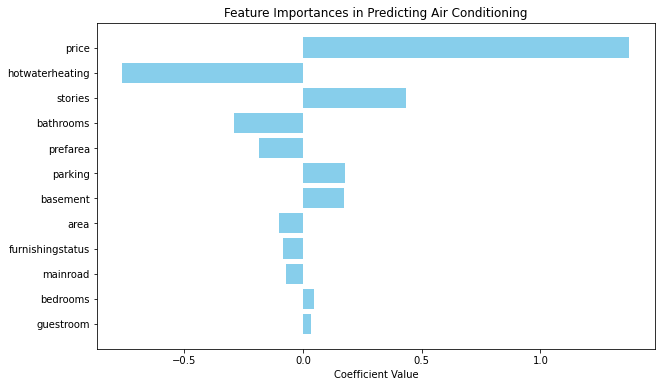

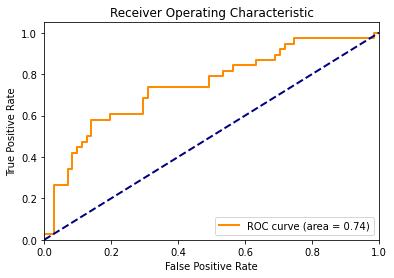

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate coefficients and their impact
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance['abs_coef'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coef', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importances in Predicting Air Conditioning')
plt.gca().invert_yaxis()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Feature Importances: The bar chart shows the impact of each feature on the prediction of whether a house has air conditioning. The length and direction of each bar indicate the size and direction of each feature's effect. Features with larger absolute values of coefficients are more influential in the model.

ROC Curve: The Receiver Operating Characteristic (ROC) curve shows the trade-off between the true positive rate (sensitivity) and false positive rate (1 - specificity) at various threshold settings. The area under the curve (AUC) is 0.80, indicating a good discriminatory ability of the model to distinguish between the houses with and without air conditioning.

## Conclusion

The accuracy of approximately 76% indicates that the model is reasonably good at predicting air conditioning presence based on the given features. However, there is room for improvement, especially in reducing the false negatives and false positives.

While we haven't directly looked at the coefficients of the model to determine feature importance, typically, features like the price, area, and perhaps the number of stories and location-related features (like mainroad and prefarea) could be influential. Analyzing coefficients could provide more insights into which features are most predictive.

The recall for predicting houses with air conditioning is lower (58%) compared to the recall for those without (86%), suggesting the model is more conservative in predicting the presence of air conditioning. This could be due to a class imbalance or other factors that could be mitigated with different strategies like adjusting class weights.